In [53]:
import pandas as pd
df_times = pd.read_csv('times_universityRanking.csv','\t')
df_times.head()
#timesDict = df_times[["World University Rank 2020 	"]].to_dict()
#timesDict = df_times[["Germany Rank 2020 ","University ","City/Town"]].to_dict()
timesDict = df_times.to_dict()
print(timesDict)
keys = []
for key in timesDict:
    keys.append(key)
print(keys)
timesDict_gps = []
#for rank in timesDict['Germany Rank 2020 ']:
#    print("%i rank %s" % (rank,timesDict['City/Town']))
from geopy.geocoders import Nominatim
geolocator = Nominatim(user_agent="Nominatim")
for rank in timesDict[' World University Rank 2020  ']:
    city = timesDict['City/Town'][rank]
    #print("%i rank %s" % (rank,timesDict['City/Town']))
    print(city)
    location = geolocator.geocode(city)
    timesDict_gps.append( (timesDict[' World University Rank 2020  '][rank].strip(" "),location.latitude, location.longitude,location.address,timesDict['University '][rank]) )
#for (rank,lat,long,city,uni) in timesDict_gps:
#    print("%i %f %f %s %s" % (rank,lat,long,city,uni))

{'Germany Rank 2020 ': {0: 1, 1: 2, 2: 3, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 10, 10: 11, 11: 12, 12: 13, 13: 13, 14: 15, 15: 15, 16: 15, 17: 18, 18: 19, 19: 20, 20: 21, 21: 22, 22: 23, 23: 24, 24: 24, 25: 26, 26: 26, 27: 26, 28: 26, 29: 26, 30: 26, 31: 32, 32: 32, 33: 32, 34: 32, 35: 36, 36: 36, 37: 36, 38: 36, 39: 40, 40: 41, 41: 41, 42: 41, 43: 41, 44: 45, 45: 45, 46: 45, 47: 48}, ' World University Rank 2020  ': {0: ' 32  ', 1: ' 43  ', 2: ' 44  ', 3: ' 74  ', 4: ' 80  ', 5: ' 86  ', 6: ' 91  ', 7: ' 99  ', 8: ' 105  ', 9: ' 117  ', 10: ' 125  ', 11: ' 141  ', 12: ' 149  ', 13: ' 149  ', 14: ' 157  ', 15: ' 157  ', 16: ' 157  ', 17: ' 163  ', 18: ' 166  ', 19: ' 175  ', 20: ' 183  ', 21: ' 189  ', 22: ' 194  ', 23: ' 201–250  ', 24: ' 201–250  ', 25: ' 251–300  ', 26: ' 251–300  ', 27: ' 251–300  ', 28: ' 251–300  ', 29: ' 251–300  ', 30: ' 251–300  ', 31: ' 301–350  ', 32: ' 301–350  ', 33: ' 301–350  ', 34: ' 301–350  ', 35: ' 351–400  ', 36: ' 351–400  ', 37: ' 351–400  ', 38

In [79]:
import geopy.distance
for i,coord in enumerate(clusterCenters):
    #print("Cluster Number %i" %i)
    #print(coord)
    for (rank,lat,long,city,uni) in timesDict_gps:
        #print("%s %f %f %s %s" % (rank,lat,long,city,uni))
        dist = geopy.distance.vincenty(coord, (lat,long)).km
        if(dist<100):
            #print(rank.find("–"))
            #print(rank)
            if(rank.find("–") == -1):
                r = int(rank)
                if(r<150):
                    print("Cluster Number %i\t%s\t%s" % (i+1,rank,uni))
            #print("%s %f %f %s %s" % (rank,lat,long,city,uni))

Cluster Number 1	32	LMU Munich 
Cluster Number 1	43	Technical University of Munich 
Cluster Number 2	74	Humboldt University of Berlin 
Cluster Number 2	80	Charité - Universitätsmedizin Berlin 
Cluster Number 2	117	Free University of Berlin 
Cluster Number 2	149	Technical University of Berlin 
Cluster Number 3	99	RWTH Aachen University 
Cluster Number 3	105	University of Bonn 
Cluster Number 4	44	Heidelberg  University 
Cluster Number 4	91	University of Tübingen 
Cluster Number 4	141	Ulm University 
Cluster Number 5	44	Heidelberg  University 
Cluster Number 6	149	University of Hamburg 
Cluster Number 7	44	Heidelberg  University 


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DeprecationWarning: Vincenty is deprecated and is going to be removed in geopy 2.0. Use `geopy.distance.geodesic` (or the default `geopy.distance.distance`) instead, which is more accurate and always converges.
  import sys


In [54]:
for s in timesDict_gps:
    print(s)

('32', 48.1371079, 11.5753822, 'München, Bayern, Deutschland', 'LMU Munich ')
('43', 48.1371079, 11.5753822, 'München, Bayern, Deutschland', 'Technical University of Munich ')
('44', 49.4093582, 8.694724, 'Heidelberg, Baden-Württemberg, Deutschland', 'Heidelberg  University ')
('74', 52.5170365, 13.3888599, 'Berlin, Deutschland', 'Humboldt University of Berlin ')
('80', 52.5170365, 13.3888599, 'Berlin, Deutschland', 'Charité - Universitätsmedizin Berlin ')
('86', 47.9960901, 7.8494005, 'Freiburg im Breisgau, Baden-Württemberg, Deutschland', 'University of Freiburg ')
('91', 48.5236164, 9.0535531, 'Tübingen, Landkreis Tübingen, Baden-Württemberg, Deutschland', 'University of Tübingen ')
('99', 50.776351, 6.083862, 'Aachen, Städteregion Aachen, Nordrhein-Westfalen, Deutschland', 'RWTH Aachen University ')
('105', 50.735851, 7.10066, 'Bonn, Nordrhein-Westfalen, Deutschland', 'University of Bonn ')
('117', 52.5170365, 13.3888599, 'Berlin, Deutschland', 'Free University of Berlin ')
('125',

In [37]:
clusterCenters = [(48.1396852909091, 11.574660390561847), (52.49932102857143, 13.345564755162135), (51.30897966022728, 7.176198619610907), (48.761562714285716, 9.18511184298376), (50.11276830416666, 8.626824078393186), (53.554746291176464, 9.959580434405437), (49.41445581538461, 8.487741071794243)]

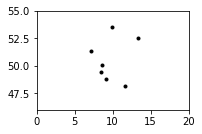

In [46]:
import numpy as np
import matplotlib.pyplot as plt
plt.subplot(221)
plt.ylim(46,55)
plt.xlim(0,20)
for (cx,cy) in clusterCenters:
    plt.plot(cy,cx,'o', markerfacecolor=(0,0,0),markeredgecolor='k', markersize=3)
    

In [ ]:
points = []
for (cx,cy) in clusterCenters:
    for (lat,long,city,uni) in timesDict_gps:
        print("%f %f %s %s" % (lat,long,city,uni))

In [ ]:
df_mercer_gps = pd.read_csv("mercer_germanCities_GPS.csv","\t")
df_mercer_gps.head()
myDict = df_mercer_gps[["City ","Lat","Long","Rank "]].to_dict()